In [21]:
import tensorflow as tf
w = tf.constant(5.0)
x = tf.constant(6.0)
b = tf.constant(10.0)

#Important: c is a computation graph that connects w, x and b,
#and outputs w*x + b. 
#c is not 40. It is a connection between nodes.
c = w*x + b 
with tf.Session() as sess: 
    print(sess.run(w))  # 5.0
    print(sess.run(c))  # 40.0
    print(c.eval()) # 40.0
    
sess = tf.Session()
print(c.eval(session=sess))  #40.0
print(sess.run(c)) # 40.0

t = tf.zeros((2,2))
with sess.as_default():
    print(t) #Tensor("zeros:0", shape=(2, 2), dtype=float32) 
    print(t.eval()) # [[ 0. 0.]
                    #  [ 0. 0.]]

5.0
40.0
40.0
40.0
40.0
Tensor("zeros:0", shape=(2, 2), dtype=float32)
[[0. 0.]
 [0. 0.]]


# Constant and Variables

In [2]:
#0-d tensors
mammal = tf.constant("Elephant", tf.string)
ignition = tf.constant(451, tf.int16)
floating = tf.constant(3.14159265359, tf.float32)

#2-d tensors
xor = tf.constant([[False, True],[True, False]], tf.bool)
cool_numbers  = tf.constant([3.14159, 2.71828], tf.float32)
squarish_squares = tf.constant([ [4, 9], [16, 25] ], tf.int32)

pi = cool_numbers[0]
my_column_vector = squarish_squares[:, 1]
ss_shape = tf.shape(squarish_squares) # [2,2]

print(pi.eval(session=sess)) # 3.14159
print(my_column_vector.eval(session=sess)) #[ 9 25]

print(ignition) # Tensor("Const_10:0", shape=(), dtype=int16)
ignition -= 271
print(ignition) # Tensor("sub_1:0", shape=(), dtype=int16)
print(ignition.eval(session=sess)) # 180

3.14159
[ 9 25]
Tensor("Const_4:0", shape=(), dtype=int16)
Tensor("sub:0", shape=(), dtype=int16)
180


In [3]:
#A name has to be given to variables.
#The name can be used in tensorboard or variables manipulations
#Inputs: get_variable(name, shape=None, dtype=None, initializer=None)
w1 = tf.get_variable("floatpointfloat", [2,2],  initializer=tf.constant_initializer([[4.4, 3.3], [1.1, 2.2]]))
w2 = tf.get_variable("zeros", [1, 2, 3], dtype=tf.int32, initializer=tf.zeros_initializer)

with tf.Session() as sess:
    #Variables have to be initialized before use.
    sess.run(tf.global_variables_initializer())
    print(sess.run(w1)) #[[4.3, 3.2], [1.1, 2.2]]
    print(sess.run(w2)) #[[[0,0,0],[0,0,0]]]

[[4.4 3.3]
 [1.1 2.2]]
[[[0 0 0]
  [0 0 0]]]


In [7]:
# lower level api for creating variable object
# mostly used for scalars
i_am_zero_variable = tf.Variable(0)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(i_am_zero_variable.eval()) #0

0


In [4]:
i_cant_be_changed = tf.constant(101)
i_can_be_changed = tf.get_variable("can_be_changed", [1],
                                   dtype=tf.int32,
                                   initializer=tf.constant_initializer([101]))

In [5]:
assign_op = i_can_be_changed.assign([5])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(i_can_be_changed))
    sess.run(assign_op)
    print(i_can_be_changed)
    print(sess.run(i_can_be_changed))

[101]
<tf.Variable 'can_be_changed:0' shape=(1,) dtype=int32_ref>
[5]


In [6]:
assign_op = i_cant_be_changed.assign([5]) #AttributeError: 'Tensor' object has no attribute 'assign'

AttributeError: 'Tensor' object has no attribute 'assign'

In [27]:
i_cant_be_changed = tf.constant(101)
#A new tensor will be created.
#The original tensor has not been modified
i_cant_be_changed += 5
with tf.Session() as sess:
    print(i_cant_be_changed.eval()) #106

106


# Inputs and Placeholders

In [8]:
# Define a placeholder that expects a vector of three floating-point values
x = tf.placeholder(tf.float32, shape=[3]) #If the shape is None, you can feed a tensor of any shape.
y = tf.square(x)

with tf.Session() as sess:
    # Value of 'y' depends on the value fed to x.
    print(sess.run([x, y], {x: [1.0, 2.0, 3.0]}))  # [array([1., 2., 3.], dtype=float32),
                                                   #  array([1., 4., 9.], dtype=float32)]
    print(sess.run(y, {x: [0.0, 0.0, 5.0]}))       # [0., 0., 25.]

[array([1., 2., 3.], dtype=float32), array([1., 4., 9.], dtype=float32)]
[ 0.  0. 25.]


In [9]:
# Raises `tf.errors.InvalidArgumentError`, because you must feed a value for
# a `tf.placeholder()` when evaluating a tensor that depends on it.
with tf.Session() as sess:
    sess.run(y)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [3]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[3], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Square/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5_Square", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 523, in run_forever
    self._run_once()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 1758, in _run_once
    handle._run()
  File "/usr/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/usr/lib/python3.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python3.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-e012f40a63e9>", line 2, in <module>
    x = tf.placeholder(tf.float32, shape=[3]) #If the shape is not specified, you can feed a tensor of any shape.
  File "/usr/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py", line 1735, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4925, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/usr/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/usr/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/usr/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [3]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[3], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Square/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5_Square", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [10]:
# Raises `ValueError`, because the shape of `37.0` does not match the shape
# of placeholder `x`.
with tf.Session() as sess:
    sess.run(y, {x: 37.0})

ValueError: Cannot feed value of shape () for Tensor 'Placeholder:0', which has shape '(3,)'

# Linear Regression

Weight:[[0.99986756]], Bias:[[0.00831092]]
Final Loss:1.3144789423602532e-10


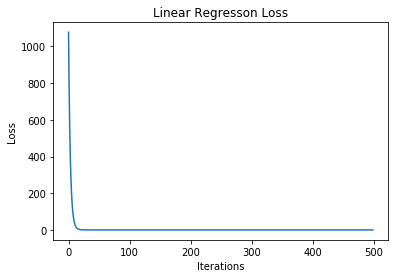

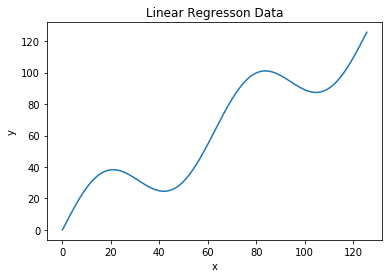

In [19]:
%matplotlib inline
import numpy as np
import tensorflow as tf
tf.reset_default_graph()
import matplotlib.pyplot as plt

# Define number of data and learning rate
n_samples = 1000
learning_rate = 2E-5 

# Generate some input data
x_data = np.linspace(0,40*np.pi, n_samples)
f = lambda x: x + 20*np.sin(x/10) 
y_data = f(x_data)

# Reshape it to 1-dimension inputs
x_data = np.reshape(x_data, (n_samples,1))
y_data = np.reshape(y_data, (n_samples,1))

# For logging the lost function
loss_log = []

# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(n_samples, 1))
y = tf.placeholder(tf.float32, shape=(n_samples, 1))

# Define variables to be learned
w = tf.get_variable("weights", (1, 1),
    initializer=tf.random_normal_initializer())
b = tf.get_variable("bias", (1,1),
    initializer=tf.constant_initializer(0.0))

# Define structure of the loss
y_pred = w*X + b
# Mean Squared Error
loss = tf.reduce_mean(y - y_pred)**2

# Operator to minimize the loss
train_opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

with tf.Session() as sess:
    # Initialize Variables in graph
    sess.run(tf.global_variables_initializer())
    # Gradient descent 500 times (500 is arbitrary)
    for i in range(500):
        # Do gradient descent step
        _, loss_val = sess.run([train_opt, loss], feed_dict={X: x_data, y: y_data})
        loss_log.append(loss_val)
    pred = sess.run(y_pred, feed_dict={X: x_data}) 
    weight, bias = sess.run([w, b])
    print('Weight:{}, Bias:{}'.format(weight, bias))
    print('Final Loss:{}'.format(loss_log[-1]))

# Plot the loss function
plt.plot(np.arange(len(loss_log)),loss_log)
plt.title('Linear Regresson Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.figure()
# Plot the data and predictions
plt.title('Linear Regresson Data and Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_data, y_data)
plt.plot(x_data, pred)
plt.show()


# Higher Level Interface

Weight:[[0.9753293]], Bias:[1.5501037]
Final Loss:1.8384538683080542e-11


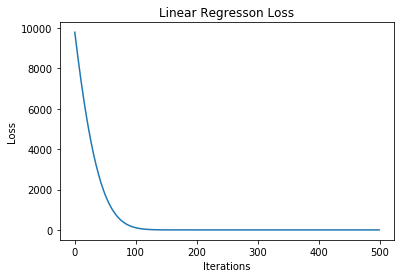

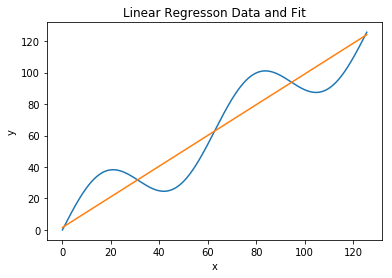

In [12]:
%matplotlib inline
import numpy as np
import tensorflow as tf
tf.reset_default_graph()
import matplotlib.pyplot as plt

n_samples = 1000
learning_rate = 2E-2

x_data = np.linspace(0,40*np.pi, n_samples)
f = lambda x: x + 20*np.sin(x/10) 
y_data = f(x_data)

x_data = np.reshape(x_data, (n_samples,1))
y_data = np.reshape(y_data, (n_samples,1))

loss_log = []

X = tf.placeholder(tf.float32, shape=(n_samples, 1))
y = tf.placeholder(tf.float32, shape=(n_samples, 1))

# Create an object of dense layer 
dense = tf.layers.Dense(1) # 1 for output dimension
y_pred = dense(X)
loss = tf.reduce_mean(y - y_pred)**2

# ADAM Optimizer: a more advanced version of gradient descent
train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(500):
      _, loss_val = sess.run([train_opt, loss], feed_dict={X: x_data, y: y_data})
      loss_log.append(loss_val)
    pred = sess.run(y_pred, feed_dict={X: x_data}) 
    weight, bias = sess.run([dense.kernel, dense.bias])
    print('Weight:{}, Bias:{}'.format(weight, bias))
    print('Final Loss:{}'.format(loss_log[-1]))

plt.plot(np.arange(len(loss_log)),loss_log)
plt.title('Linear Regresson Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.figure()

plt.title('Linear Regresson Data and Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_data, y_data)
plt.plot(x_data, pred)
plt.show()

# Recurrent Neural Networks for NLP

## Minibatch and rnn

Final Loss 0.151392


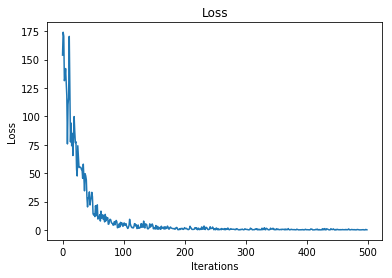

Sum from RNN [[15.100087]]
True sum 15
Sum from RNN [[12.841793]]
True sum 16


In [13]:
%matplotlib inline
###
# Calculates the sum of a list
###
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.reset_default_graph()

def generate_data(amount):
    x = np.random.uniform(low=-10, high=10, size=(amount,5,1))
    y = np.sum(x, 1)
    return x, y

def read_batch(stream, batch_size):
    head = 0
    while True:
        batch = []
        for item in stream:
            batch.append(item[head:head+batch_size])
        yield batch
        head += batch_size
        head %= len(stream[0])-batch_size

class SumRNN(object):
    def __init__(self):
        self.lstm_size = 32
        self.learning_rate = 0.01
        self.data_amount = 10000
        self.batch_size = 100
        self.loss_logs = []
        self.input_data, self.target_data = generate_data(self.data_amount)
        self.create_model()
    
    
    @staticmethod
    def create_rnn(lstm_size, data):
        #Create a LSTMCell with hidden size lstm_size
        rnn_cell = tf.contrib.rnn.LSTMCell(lstm_size) 
        #Get the zero state of rnn_cell
        initial_state = rnn_cell.zero_state(tf.shape(data)[0], tf.float32)
        #Create a rnn with the cell.
        #Dynamic means the input length can be a variable
        outputs, state = tf.nn.dynamic_rnn(rnn_cell, data, 
                                           initial_state=initial_state,
                                           dtype=tf.float32)
        #Get the last output only and pass it through a dense layer
        outputs = tf.layers.dense(outputs[:,-1], 1)
        return outputs

    def create_placeholders(self):
        self.inputs = tf.placeholder(dtype=tf.float32, shape=[None, None, 1])
        self.targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
        
    @staticmethod
    def calculate_loss(predictions, targets):
        #L2 loss
        loss = tf.reduce_mean(tf.square(predictions-targets))
        return loss
    
    def create_model(self):
        self.create_placeholders()
        self.outputs = self.create_rnn(self.lstm_size, self.inputs)
        self.loss = self.calculate_loss(self.outputs, self.targets)
        self.train_opt = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.loss)
        
    @staticmethod
    def plot_results(loss_logs):
        plt.plot(np.arange(len(loss_logs)), loss_logs)
        plt.title('Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()
        
    def train(self):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            #Create a iterator that feed minibatches
            batch_feeder = read_batch([self.input_data, self.target_data], self.batch_size)
            for _ in range(500):
                batch_inputs, batch_targets = next(batch_feeder)
                feed_dict = {self.inputs: batch_inputs,
                             self.targets: batch_targets}
                loss, _ = sess.run([self.loss, self.train_opt], feed_dict=feed_dict)
                self.loss_logs.append(loss)
            print('Final Loss', loss)
            #The noisy loss comes from the minibatch
            self.plot_results(self.loss_logs)

            #Test the rnn
            self.infer(sess, [1,2,3,4,5])
            #The rnn does not generalize well to lengths other than 5
            self.infer(sess, [1,2,3,4,5,1])

                
    def infer(self, sess, test_input):            
            test_input = np.reshape(test_input, (1,len(test_input),1))
            print('Sum from RNN', sess.run(self.outputs, feed_dict={self.inputs:test_input}))
            print('True sum', test_input.sum())
            
model = SumRNN()
model.train()

In [14]:
%matplotlib inline
#TODO
###
# Calculates the sum of a list with variable length
###
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.reset_default_graph()

def generate_data(amount):
    lengths = np.random.randint(low=1, high=10, size=amount)
    x = []
    y = []
    for i in lengths:
        x.append(np.random.uniform(low=-10, high=10, size=(i,1)).tolist())
        y.append(np.sum(x))
    return x, y

def generate_shuffle_key(length):
    shuffle_key = np.arange(length)
    np.random.shuffle(shuffle_key)
    return shuffle_key

def pad_data(item):
    """
    Pads a 2d array with zeros.
    Input:
    [[1,2],
     [3,4,5,6],
     [7,8,9]]
    Output:
    [[1,2,0,0],
     [3,4,5,6],
     [7,8,9,0]], (2,4,3)
    """
    lengths = [len(i) for i in item]
    maxlen = max(lengths)
    x = np.zeros([len(item), maxlen], dtype=np.int32)
    for i, x_i in enumerate(x):
        x_i[:lengths[i]] = item[i]
    return x, lengths


    
def read_batch(stream, batch_size):
    head = 0
    stream[0] = pad_data(stream[0])
    while True:
        batch = []
        for item in stream:
            batch.append(item[head:head+batch_size])
        yield batch
        head += batch_size
        if head+batch_size > len(stream[0]):
            head = 0
            shuffle_key = generate_shuffle_key(len(stream[0]))
            for i, _ in enumerate(stream):
                stream[i] = stream[i][shuffle_key]
                

class SumRNN(object):
    def __init__(self):
        self.lstm_size = 32
        self.learning_rate = 0.01
        self.data_amount = 10000
        self.batch_size = 100
        self.input_data, self.target_data = generate_data(self.data_amount)
        self.create_model()
    
        self.loss_logs = []
    
    @staticmethod
    def create_rnn(lstm_size, data):
        rnn_cell = tf.contrib.rnn.LSTMCell(lstm_size)
        initial_state = rnn_cell.zero_state(tf.shape(data)[0], tf.float32)

        # 'state' is a tensor of shape [batch_size, cell_state_size]
        outputs, state = tf.nn.dynamic_rnn(rnn_cell, data,
                                       initial_state=initial_state,
                                       dtype=tf.float32)
        outputs = tf.layers.dense(outputs[:,-1], 1)
        return outputs

    def create_placeholders(self):
        #self.inputs = tf.placeholder(dtype=tf.float32, shape=[self.batch_size, None, 1])
        self.inputs = tf.placeholder(dtype=tf.float32, shape=[None, None, 1])
        self.targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
        
    @staticmethod
    def calculate_loss(predictions, targets):
        loss = tf.reduce_mean(tf.square(predictions-targets))
        return loss
    
    def create_model(self):
        self.create_placeholders()
        self.outputs = self.create_rnn(self.lstm_size, self.inputs)
        self.loss = self.calculate_loss(self.outputs, self.targets)
        self.train_opt = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.loss)
        
    def plot_results(self):
        plt.plot(np.arange(len(self.loss_logs)),self.loss_logs)
        plt.title('Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()
        
    def train(self):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            batch_feeder = read_batch([self.input_data, self.target_data], self.batch_size)
            for _ in range(500):
                batch_inputs, batch_targets = next(batch_feeder)
                feed_dict = {self.inputs: batch_inputs,
                             self.targets: batch_targets}
                loss, _ = sess.run([self.loss, self.train_opt], feed_dict=feed_dict)
                self.loss_logs.append(loss)
            print(loss)
            self.plot_results()

            self.infer(sess, [1,2,3,4,5])
            self.infer(sess, [1,2,3,4,5,1])

                
    def infer(self, sess, test_input):            
            test_input = np.reshape(test_input, (1,len(test_input),1))
            print('Sum from RNN', sess.run(self.outputs, feed_dict={self.inputs:test_input}))
            print('True sum', test_input.sum())
            
model = SumRNN()
model.train()

KeyboardInterrupt: 

# Useful Functions

## tf.einsum

In [16]:
#Almost the same as np.einsum (See: https://github.com/tensorflow/tensorflow/issues/4722)
#Does einsum summation convention
import tensorflow as tf
a = tf.constant([[1,2,3], [4,5,6]])
b = tf.constant([3,4,5])
#Tensor contraction a_ij*b^j -> c_i or matrix multiplication
c = tf.einsum('ij,j->i', a, b)
#broadcasted multiplication a_ij*b^j -> c_ij (matrix multiplication without summing)
d = tf.einsum('ij,j->ij', a, b)
#Trace of a
e = tf.einsum('ii->', a)
with tf.Session() as sess:
    print('ij,j->i: ', c.eval())  #ij,j->i:  [26 62]
    print('ij,j->ij: ', d.eval()) #ij,j->ij:  [[ 3  8 15]
                                  #            [12 20 30]]
    print('ii->: ', e.eval())     #ii->:  21

ij,j->i:  [26 62]
ij,j->ij:  [[ 3  8 15]
 [12 20 30]]
ii->:  21


## Save and Restore Variables

In [13]:
# Create some variables.
v1 = tf.get_variable("v1", shape=[3], initializer = tf.zeros_initializer)
v2 = tf.get_variable("v2", shape=[5], initializer = tf.zeros_initializer)

inc_v1 = v1.assign(v1+1)
dec_v2 = v2.assign(v2-1)

# Add an op to initialize the variables.
init_op = tf.global_variables_initializer()

# Add ops to save and restore ALL the variables.
saver = tf.train.Saver()

# Later, launch the model, initialize the variables, do some work, and save the
# variables to disk.
with tf.Session() as sess:
  sess.run(init_op)
  # Do some work with the model.
  inc_v1.op.run()
  dec_v2.op.run()
  # Save the variables to disk.
  save_path = saver.save(sess, "/tmp/model.ckpt")
  print("Model saved in path: %s" % save_path)

Model saved in path: /tmp/model.ckpt


In [17]:
tf.reset_default_graph()

# Create some variables.
v1 = tf.get_variable("v1", shape=[3])
v2 = tf.get_variable("v2", shape=[5])

# Add ops to save and restore ALL the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "/tmp/model.ckpt")
  print("Model restored.")
  # Check the values of the variables
  print("v1 : %s" % v1.eval()) #v1 : [1. 1. 1.]
  print("v2 : %s" % v2.eval()) #v2 : [-1. -1. -1. -1. -1.]

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt
Model restored.
v1 : [1. 1. 1.]
v2 : [-1. -1. -1. -1. -1.]


# Trump Tweets Generator

In [ ]:
""" A clean, no_frills character-level generative language model.

CS 20: "TensorFlow for Deep Learning Research"
cs20.stanford.edu
Danijar Hafner (mail@danijar.com)
& Chip Huyen (chiphuyen@cs.stanford.edu)
Lecture 11
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import random
import sys
sys.path.append('..')
import time

import tensorflow as tf

def safe_mkdir(path):
    """ Create a directory if there isn't one already. """
    try:
        os.mkdir(path)
    except OSError:
        pass

def vocab_encode(text, vocab):
    return [vocab.index(x) for x in text if x in vocab]

def vocab_decode(array, vocab):
    return ''.join([vocab[x] if x>=0 else 'PAD' for x in array])

def read_data(filename, vocab, window, overlap):
    lines = [line.strip() for line in open(filename, 'r').readlines()]
    while True:
        random.shuffle(lines)

        for text in lines:
            text = vocab_encode(text, vocab)
            for start in range(0, len(text), overlap):
                chunk = text[start: start + window]
                chunk += [-1]*(window-len(chunk))
                yield chunk

def read_batch(stream, batch_size):
    batch = []
    for element in stream:
        batch.append(element)
        if len(batch) == batch_size:
            yield batch
            batch = []
    yield batch

class CharRNN(object):
    def __init__(self, model):
        self.model = model
        self.path = 'data/' + model + '.txt'
        if 'trump' in model:
            self.vocab = (" $%'()+,-./123456790:;=?ABCDEFGHIJKLMNOPQRSTUVWXYZ"
                    "'\"_abcdefghijklmnopqrstuvwxyz{|}@#➡📈")
        else:
            self.vocab = (" $%'()+,-./0123456789:;=?ABCDEFGHIJKLMNOPQRSTUVWXYZ"
                    "\\^_abcdefghijklmnopqrstuvwxyz{|}")

        self.seq = tf.placeholder(tf.int32, [None, None])
        self.temp = tf.constant(.5)
        self.hidden_sizes = [128, 256]
        self.batch_size = 128
        self.lr = 0.0003
        self.skip_step = 50 # number of training per infer
        self.num_steps = 50 # number of chars for RNN unrolled
        self.len_generated = 200
        self.gstep = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')

    def create_rnn(self, seq):
        layers = [tf.nn.rnn_cell.GRUCell(size) for size in self.hidden_sizes]
        cells = tf.nn.rnn_cell.MultiRNNCell(layers)
        batch = tf.shape(seq)[0]
        zero_states = cells.zero_state(batch, dtype=tf.float32)
        self.in_state = tuple([tf.placeholder_with_default(state, [None, state.shape[1]]) 
                                for state in zero_states])

        length = tf.reduce_sum(tf.reduce_max(seq, 2), 1)
        self.output, self.out_state = tf.nn.dynamic_rnn(cells, seq, length, self.in_state)

    def create_model(self):
        seq = tf.one_hot(self.seq, len(self.vocab))
        self.create_rnn(seq)
        self.logits = tf.layers.dense(self.output, len(self.vocab), None)
        loss = tf.nn.softmax_cross_entropy_with_logits(logits=self.logits[:, :-1], 
                                                        labels=seq[:, 1:])
        self.loss = tf.reduce_sum(loss)
        self.sample = tf.multinomial(self.logits[:, -1] / self.temp, 1)[:, 0] 
        self.opt = tf.train.AdamOptimizer(self.lr).minimize(self.loss, global_step=self.gstep)

    def train(self):
        saver = tf.train.Saver()
        start = time.time()
        min_loss = None
        with tf.Session() as sess:
            #To log the graph of the neural network to tensorboard
            writer = tf.summary.FileWriter('graphs/gist', sess.graph)
            sess.run(tf.global_variables_initializer())
            
            #Restore model
            ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/' + self.model + '/checkpoint'))
            if ckpt and ckpt.model_checkpoint_path:
                saver.restore(sess, ckpt.model_checkpoint_path)
            
            iteration = self.gstep.eval()
            stream = read_data(self.path, self.vocab, self.num_steps, overlap=self.num_steps//2)
            data = read_batch(stream, self.batch_size)
            while True:
                batch = next(data)
                batch_loss, _ = sess.run([self.loss, self.opt], {self.seq: batch})
                if (iteration + 1) % self.skip_step == 0:
                    print('Iter {}. \n    Loss {}. Time {}'.format(iteration, batch_loss, time.time() - start))
                    self.online_infer(sess)
                    start = time.time()
                    checkpoint_name = 'checkpoints/' + self.model + '/char-rnn'
                    if min_loss is None:
                        saver.save(sess, checkpoint_name, iteration)
                    elif batch_loss < min_loss:
                        saver.save(sess, checkpoint_name, iteration)
                        min_loss = batch_loss
                iteration += 1

    def online_infer(self, sess):
        """ Generate sequence one character at a time, based on the previous character
        """
        for seed in ['Hillary', 'I', 'R', 'T', '@', 'N', 'M', '.', 'G', 'A', 'W']:
            sentence = seed
            state = None
            for _ in range(self.len_generated):
                batch = [vocab_encode(sentence[-1], self.vocab)]
                feed = {self.seq: batch}
                if state is not None: # for the first decoder step, the state is None
                    for i in range(len(state)):
                        feed.update({self.in_state[i]: state[i]})
                index, state = sess.run([self.sample, self.out_state], feed)
                sentence += vocab_decode(index, self.vocab)
            print('\t' + sentence)

def main():
    model = 'trump_tweets'
    safe_mkdir('checkpoints')
    safe_mkdir('checkpoints/' + model)

    lm = CharRNN(model)
    lm.create_model()
    lm.train()
    
if __name__ == '__main__':
    main()


# tf.Print

In [15]:
import sys
def tf_print(op, tensors, message=''): 
    #redirective output from stderr to stdout for demonstrative purpose
    def print_message(x):
        sys.stdout.write(message + " %s\n" % x)
        return x

    prints = [tf.py_func(print_message, [tensor], tensor.dtype) for tensor in tensors]
    with tf.control_dependencies(prints):
        op = tf.identity(op)
    return op

In [16]:
import tensorflow as tf
tf.reset_default_graph()

x = tf.placeholder(shape=[], dtype=tf.float32, name='x')
y = tf.square(x)
y = tf_print(y, [y], message='y: ')
z = tf.sqrt(y)

with tf.Session() as sess:
    print(sess.run(z, feed_dict={x:-3}))

y:  9.0
3.0


# Debugging

## Check for missing connections

In [17]:
import tensorflow as tf
tf.reset_default_graph()

def test_all_trainables_changed(sess, train_op, feed):
    sess.run(tf.global_variables_initializer())
    #Get a list of values of all trainable variables
    before = sess.run(tf.trainable_variables())
    #Gradient descent the variables once
    _ = sess.run(train_op, feed)
    #Get the values after being trained once
    after = sess.run(tf.trainable_variables())
    #Get a list of names of all trainable variable
    trainable_names = [v.name for v in tf.trainable_variables()]
    #Check for each trainable variable
    for i, (b, a) in enumerate(zip(before, after)):
        # Make sure something changed.
        assert (b != a).any(), '{} not changed'.format(trainable_names[i])

learning_rate = 0.01
hidden_units = 8

x = tf.placeholder(tf.float32, [None, 5])
y = tf.placeholder(tf.float32, [None, 2])

# Stacked dense layers example
output = tf.layers.dense(x, hidden_units)
output = tf.nn.relu(output)
output = tf.layers.dense(x, hidden_units)
output = tf.nn.relu(output)
output = tf.layers.dense(x, hidden_units)
output = tf.nn.relu(output)
output = tf.layers.dense(x, 2)
output = tf.nn.relu(output)

loss = tf.reduce_mean((y - output)**2)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

with tf.Session() as sess:
    feed = {x:[[1,2,3,4,5]], y:[[2,4]]}
    test_all_trainables_changed(sess, train_op, feed)



AssertionError: dense/kernel:0 not changed

## Insert NaN into inputs


 x [-9.7094228  -6.30318087 -7.58721336  5.63902267 -2.27811707]
y 0
output [0.0007992  0.00949341 0.01229813 0.00716891 0.00225313]

 x [-9.7094228  -6.30318087 -7.58721336  5.63902267 -2.27811707]
y 0
output [0.00099776 0.00943848 0.01227802 0.00673182 0.0024643 ]

 x [-9.7094228  -6.30318087 -7.58721336  5.63902267 -2.27811707]
y 0
output [0.00122693 0.00931066 0.01230152 0.00635852 0.00266232]

 x [-9.7094228  -6.30318087 -7.58721336  5.63902267 -2.27811707]
y 0
output [0.0014853  0.00913952 0.01236539 0.00602461 0.00284451]

 x [-9.7094228  -6.30318087 -7.58721336  5.63902267 -2.27811707]
y 0
output [0.00177232 0.00892803 0.01246845 0.00572553 0.00301226]

 x [-9.7094228  -6.30318087 -7.58721336  5.63902267 -2.27811707]
y 0
output [0.00208765 0.00866213 0.01261188 0.00546111 0.0031665 ]

 x [-9.7094228  -6.30318087 -7.58721336  5.63902267 -2.27811707]
y 0
output [0.00243936 0.00833574 0.0128089  0.00524187 0.00330879]

 x [-9.7094228  -6.30318087 -7.58721336  5.63902267 -2.278117

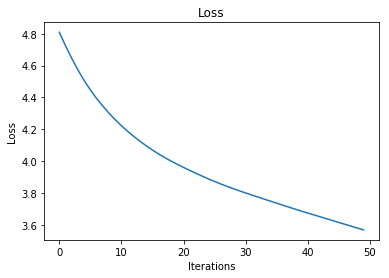

<Figure size 432x288 with 0 Axes>

In [18]:
%matplotlib inline
####
#Give the index of the minimum element of a list
####
import matplotlib.pyplot as plt
import tensorflow as tf
tf.reset_default_graph()

learning_rate = 0.01
hidden_units = 8
input_vector_size = 5

x = tf.placeholder(tf.float32, [None, input_vector_size])
y = tf.placeholder(tf.int32, [None])

# Stacked dense layers example
output = tf.layers.dense(x, hidden_units)
output = tf.nn.tanh(output)
output = tf.layers.dense(output, hidden_units)
output = tf.nn.tanh(output)
output = tf.layers.dense(output, input_vector_size)
output = tf.nn.softmax(output, axis=0)

y_onehot = tf.one_hot(y, input_vector_size)
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_onehot*tf.log(output+1e-10), reduction_indices=[1]))
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy_loss)

def generate_data(amount):
    x = np.random.uniform(low=-10, high=10, size=(amount, input_vector_size))
    y = np.argmin(x, axis=-1)
    return x, y

loss = []

x_data, y_data = generate_data(100)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(50):
        feed = {x:x_data, y:y_data}
        loss_, _, probabilities = sess.run([cross_entropy_loss, train_op, output], feed)
        loss.append(loss_)
        feed = {x:[x_data[0]]}
        print('\n x', x_data[0])
        print('y', y_data[0])
        print('output', probabilities[0])

plt.plot(np.arange(len(loss)),loss)
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.figure()
plt.show()

In [19]:
x = output
output = tf_print(output, [output], message='1')
output = tf.layers.dense(output, hidden_units)
output = tf_print(output, [output], message='2')
output = tf.nn.tanh(output)
output = tf_print(output, [output], message='3')
output = tf.layers.dense(output, hidden_units)
output = tf_print(output, [output], message='4')
output = tf.nn.tanh(output)
output = tf_print(output, [output], message='5')
output = tf.layers.dense(output, 5)
output = tf.nn.softmax(output, axis=0)
output = tf_print(output, [output], message='6')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(50):
        feed = {x:[[float('NaN'),1,2,3,4], [6,2,6,2,5],[5,2,6,7,8]]}
        probabilities = sess.run([output], feed)

1 [[nan  1.  2.  3.  4.]
 [ 6.  2.  6.  2.  5.]
 [ 5.  2.  6.  7.  8.]]
2 [[       nan        nan        nan        nan        nan        nan
         nan        nan]
 [ 6.7200537 -3.104074   2.0084226 -4.9884796 -3.583696  -3.3608441
   8.882267   1.2932125]
 [ 4.149077  -5.721452   2.8778791 -9.118938  -6.7176676 -5.8348165
  11.175782   2.572101 ]]
3 [[        nan         nan         nan         nan         nan         nan
          nan         nan]
 [ 0.9999971  -0.99598217  0.96461785 -0.9999071  -0.9984585  -0.9975939
   0.99999994  0.85996556]
 [ 0.9995022  -0.99997854  0.99369097 -1.         -0.9999971  -0.9999829
   1.          0.9884014 ]]
4 [[        nan         nan         nan         nan         nan         nan
          nan         nan]
 [-1.7446182   0.25787395 -0.34491152 -0.3939872   1.1907474   0.37052903
   0.7758334   0.26336858]
 [-1.7878999   0.21960437 -0.370683   -0.4387458   1.2222266   0.37474382
   0.7153457   0.26629022]]
5 [[        nan         nan         

# Tensorboard

In [41]:
%matplotlib inline
####
#Give the index of the minimum element of a list
####
import matplotlib.pyplot as plt
import tensorflow as tf
tf.reset_default_graph()

learning_rate = 0.01
hidden_units = 32
input_vector_size = 5

def get_grads_and_vars(cost):
    tvars = tf.trainable_variables() #Get a list of all trainable variables
    grads = tf.gradients(cost, tvars) #Get the gradients of all trainable variables wrt cost
    grads_and_vars = list(zip(grads, tvars)) #list because zip iterator needs to be read twice
    return grads_and_vars

def create_summary(loss, grads_and_vars):                                             
    tf.summary.scalar("loss", loss) #Create scalar plot of loss
    for g, v in grads_and_vars:                                                       
        print(g,v)
        tf.summary.histogram(v.name, v) #Plot histrogram of weights and bias                       
        tf.summary.histogram(v.name + '_grad', g) #Plot histogram of gradients          
    return tf.summary.merge_all() #Merge the summary operators into a single summary operator

x = tf.placeholder(tf.float32, [None, input_vector_size], name='x')
y = tf.placeholder(tf.int32, [None], name='y')

# Stacked dense layers example
output = tf.layers.dense(x, hidden_units)
output = tf.nn.tanh(output)
output = tf.layers.dense(output, hidden_units)
output = tf.nn.tanh(output)
output = tf.layers.dense(output, input_vector_size)
output = tf.nn.softmax(output, axis=1)

y_onehot = tf.one_hot(y, input_vector_size)
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_onehot*tf.log(output+1e-10), reduction_indices=[1]))

grads_and_vars = get_grads_and_vars(cross_entropy_loss)
#This line is changed because gradients are already calculated
optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.apply_gradients(grads_and_vars)

summary_op = create_summary(cross_entropy_loss, grads_and_vars)
writer = tf.summary.FileWriter('train', sess.graph) #Create a writer for tensorboard and save at ./train/


def generate_data(amount):
    x = np.random.uniform(low=-10, high=10, size=(amount, input_vector_size))
    y = np.argmin(x, axis=-1)
    return x, y

x_data, y_data = generate_data(100)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        feed = {x:x_data, y:y_data}
        #Set to trace all metadata for tensorboard
        run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
        run_metadata = tf.RunMetadata()
        _, summary = sess.run([train_op, summary_op], feed,
                               options=run_options,
                               run_metadata=run_metadata)
        #Get the summaries and log it as the 'i'th run
        writer.add_summary(summary, i)
        #Get metadata such as memory usage and computation time
        writer.add_run_metadata(run_metadata, 'step %d' % i)

Tensor("gradients/dense/MatMul_grad/MatMul_1:0", shape=(5, 32), dtype=float32) <tf.Variable 'dense/kernel:0' shape=(5, 32) dtype=float32_ref>
INFO:tensorflow:Summary name dense/kernel:0 is illegal; using dense/kernel_0 instead.
INFO:tensorflow:Summary name dense/kernel:0_grad is illegal; using dense/kernel_0_grad instead.
Tensor("gradients/dense/BiasAdd_grad/BiasAddGrad:0", shape=(32,), dtype=float32) <tf.Variable 'dense/bias:0' shape=(32,) dtype=float32_ref>
INFO:tensorflow:Summary name dense/bias:0 is illegal; using dense/bias_0 instead.
INFO:tensorflow:Summary name dense/bias:0_grad is illegal; using dense/bias_0_grad instead.
Tensor("gradients/dense_1/MatMul_grad/MatMul_1:0", shape=(32, 32), dtype=float32) <tf.Variable 'dense_1/kernel:0' shape=(32, 32) dtype=float32_ref>
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/kernel:0_grad is illegal; using dense_1/kernel_0_grad instead.
Tensor("gradients/dense_